## Graph Convolutional Networks

Source: https://mlabonne.github.io/blog/posts/2022-02-20-Graph_Convolution_Network.html

In [3]:
%pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

UsageError: Line magic function `%pip3` not found.


     -------------------------------------- 172.3/172.3 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 1.7 MB/s eta 0:00:00
     -------------------------------------- 133.1/133.1 kB 2.0 MB/s eta 0:00:00
     -------------------------------------- 536.2/536.2 kB 2.0 MB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
%pip install -q torch-scatter -f https://data.pyg.org/whl/torch-2.0.1.html
%pip install -q torch-sparse -f https://data.pyg.org/whl/torch-2.0.1.html
%pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
%pip install ffmpeg-python

Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: torch-scatter is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  error: subprocess-exited-with-error
  
  × Running setup.py install for torch-scatter did not run successfully.
  │ exit code: 1
  ╰─> [35 lines of output]
      running install
      c:\Users\getan\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\torch_scatter
      copying torch_scatter\placeholder.py -> 

Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: torch-sparse is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  error: subprocess-exited-with-error
  
  × Running setup.py install for torch-sparse did not run successfully.
  │ exit code: 1
  ╰─> [58 lines of output]
      running install
      c:\Users\getan\AppData\Local\Programs\Python\Python311\Lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
        warnings.warn(
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-311
      creating build\lib.win-amd64-cpython-311\torch_sparse
      copying torch_sparse\add.py -> build\lib.wi

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt 
import networkx as nx

In [2]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()

print (dataset)
print('---------------')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

KarateClub()
---------------
Number of graphs: 1
Number of features: 34
Number of classes: 4


- 1 graph
- 34 features
- 4 classes

In [3]:
print(f'Graph: {dataset[0]}')

Graph: Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


- x=[34,34] : Node Feature Matrix (no. of nodes, no. of features)
- edge_index=[2,156] : Graph connectivity (how nodes are connected)
- y = [34] : Node ground truth labels (class assigned to each node)
- train_mask = [34] : Optional attribute to  know which nodes to be used for training

In [4]:
data = dataset[0]

print(f'x = {data.x.shape}')
print(data.x)

x = torch.Size([34, 34])
tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])


In [5]:
print(f'edge_index = {data.edge_index.shape}')
print(data.edge_index)

edge_index = torch.Size([2, 156])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,
          1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,
          3,  3,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,
          7,  7,  8,  8,  8,  8,  8,  9,  9, 10, 10, 10, 11, 12, 12, 13, 13, 13,
         13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 19, 20, 20, 21,
         21, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 25, 25, 25, 26, 26, 27, 27,
         27, 27, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31, 31, 31, 31,
         31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33,
         33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33],
        [ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 17, 19, 21, 31,  0,  2,
          3,  7, 13, 17, 19, 21, 30,  0,  1,  3,  7,  8,  9, 13, 27, 28, 32,  0,
          1,  2,  7, 12, 13,  0,  6, 10,  0,  6, 10, 16,  0,  4,  5, 16,  0,  1,
          2,  3, 

In [6]:
from torch_geometric.utils import to_dense_adj

A = to_dense_adj(data.edge_index)[0].numpy().astype(int)
print(f'A = {A.shape}')
print(A)

A = (34, 34)
[[0 1 1 ... 1 0 0]
 [1 0 1 ... 0 0 0]
 [1 1 0 ... 0 1 0]
 ...
 [1 0 0 ... 0 1 1]
 [0 0 1 ... 1 0 1]
 [0 0 0 ... 1 1 0]]


In [7]:
print(f'y = {data.y.shape}')
print(data.y)

y = torch.Size([34])
tensor([1, 1, 1, 1, 3, 3, 3, 1, 0, 1, 3, 1, 1, 1, 0, 0, 3, 1, 0, 1, 0, 1, 0, 0,
        2, 2, 0, 0, 2, 0, 0, 2, 0, 0])


In [8]:
print(f'train_mask = {data.train_mask.shape}')
print(data.train_mask)

train_mask = torch.Size([34])
tensor([ True, False, False, False,  True, False, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False, False, False, False,  True, False, False, False, False, False,
        False, False, False, False])


In [9]:
print(f'Edges are directed: {data.is_directed()}')
print(f'Graph has isolated nodes: {data.has_isolated_nodes()}')
print(f'Graph has loops: {data.has_self_loops()}')

Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


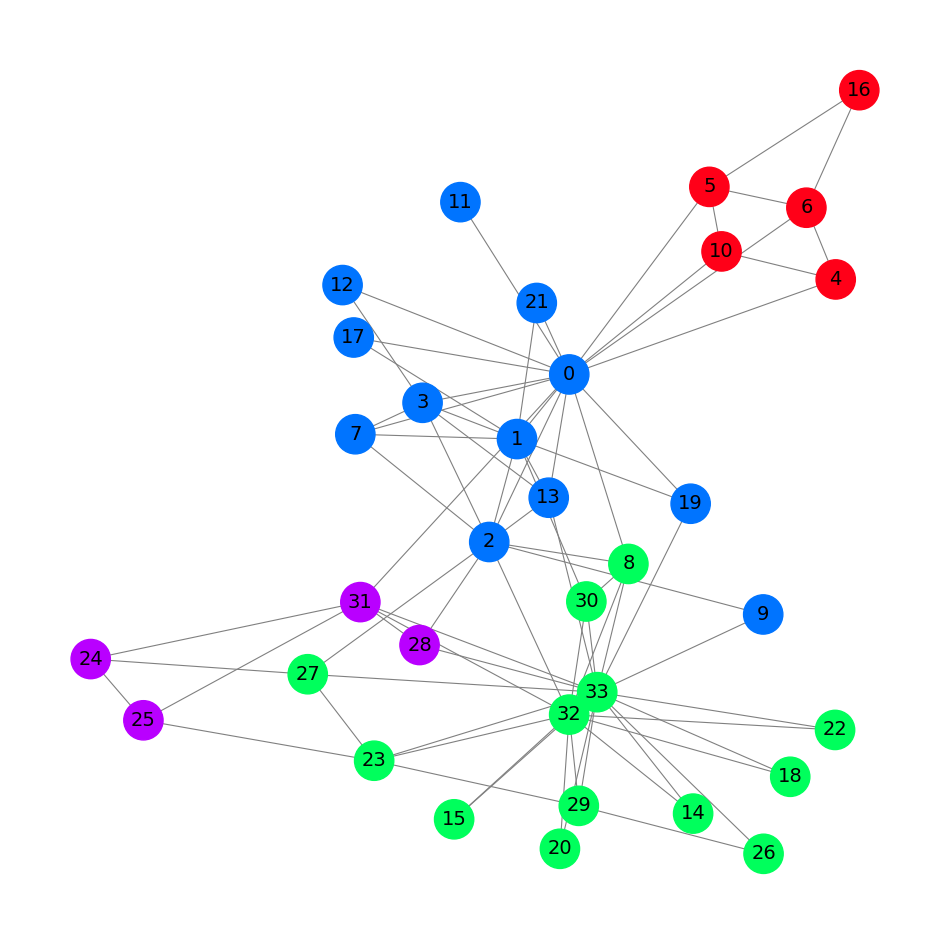

In [10]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(12,12))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=0),
                 with_labels=True,
                 node_size=800,
                 node_color=data.y,
                 cmap="hsv",
                 vmin=-2,
                 vmax=3,
                 width=0.8,
                 edge_color="grey",
                 font_size=14
                 )
plt.show()

In [11]:
from torch.nn import Linear
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.gcn = GCNConv(dataset.num_features, 3)
        self.out = Linear(3, dataset.num_classes)
    
    def forward(self, x, edge_index):
        h = self.gcn(x, edge_index).relu()
        z = self.out(h)
        return h, z
    
model = GCN()
print(model)

GCN(
  (gcn): GCNConv(34, 3)
  (out): Linear(in_features=3, out_features=4, bias=True)
)


In [12]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.02)

def accuracy(pred_y,y):
    return(pred_y == y).sum()/len(y)

embeddings = []
losses = []
accuracies = []
outputs = []

for epoch in range(201):
    optimizer.zero_grad()
    h, z = model(data.x, data.edge_index)
    loss = criterion(z, data.y)
    acc = accuracy(z.argmax(dim=1), data.y)
    loss.backward()
    optimizer.step()
    embeddings.append(h)
    losses.append(loss)
    accuracies.append(acc)
    outputs.append(z.argmax(dim=1))

    if epoch % 10 == 0:
        print(f'Epoch {epoch:>3} | Loss: {loss:.2f} | Acc: {acc*100:.2f}%')

Epoch   0 | Loss: 1.30 | Acc: 38.24%
Epoch  10 | Loss: 1.11 | Acc: 73.53%
Epoch  20 | Loss: 0.93 | Acc: 73.53%
Epoch  30 | Loss: 0.76 | Acc: 73.53%
Epoch  40 | Loss: 0.59 | Acc: 82.35%
Epoch  50 | Loss: 0.43 | Acc: 91.18%
Epoch  60 | Loss: 0.29 | Acc: 100.00%
Epoch  70 | Loss: 0.20 | Acc: 100.00%
Epoch  80 | Loss: 0.14 | Acc: 100.00%
Epoch  90 | Loss: 0.10 | Acc: 100.00%
Epoch 100 | Loss: 0.07 | Acc: 100.00%
Epoch 110 | Loss: 0.06 | Acc: 100.00%
Epoch 120 | Loss: 0.05 | Acc: 100.00%
Epoch 130 | Loss: 0.04 | Acc: 100.00%
Epoch 140 | Loss: 0.03 | Acc: 100.00%
Epoch 150 | Loss: 0.03 | Acc: 100.00%
Epoch 160 | Loss: 0.03 | Acc: 100.00%
Epoch 170 | Loss: 0.02 | Acc: 100.00%
Epoch 180 | Loss: 0.02 | Acc: 100.00%
Epoch 190 | Loss: 0.02 | Acc: 100.00%
Epoch 200 | Loss: 0.02 | Acc: 100.00%


In [17]:
%%capture
from IPython.display import HTML
from matplotlib import animation
plt.rcParams["animation.bitrate"] = 3000

def animate(i):
    G = to_networkx(data, to_undirected=True)
    nx.draw_networkx(G,
                    pos=nx.spring_layout(G, seed=0),
                    with_labels=True,
                    node_size=800,
                    node_color=outputs[i],
                    cmap="hsv",
                    vmin=-2,
                    vmax=3,
                    width=0.8,
                    edge_color="grey",
                    font_size=14
                    )
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=20)

fig = plt.figure(figsize=(12, 12))
plt.axis('off')
plt.rcParams['animation.ffmpeg_path'] = r'C:\\Users\\getan\\Downloads\\FFmpeg\\bin\\ffmpeg.exe'
anim = animation.FuncAnimation(fig, animate, \
            np.arange(0, 200, 10), interval=500, repeat=True)
html = HTML(anim.to_html5_video())

In [18]:
display(html)

In [19]:
print(f'Final Embeddings = {h.shape}')
print(h)

Final Embeddings = torch.Size([34, 3])
tensor([[2.1551e+00, 1.9941e+00, 2.1752e+00],
        [1.4965e+00, 6.3545e-01, 2.6195e+00],
        [8.2095e-01, 9.0716e-01, 1.7025e+00],
        [1.4441e+00, 9.1552e-01, 2.4615e+00],
        [2.2819e+00, 2.3540e+00, 4.7201e-02],
        [2.5081e+00, 2.4877e+00, 0.0000e+00],
        [2.5783e+00, 2.4989e+00, 0.0000e+00],
        [1.2744e+00, 9.2938e-01, 1.9336e+00],
        [0.0000e+00, 0.0000e+00, 5.6115e-02],
        [8.3741e-01, 7.3780e-01, 1.6068e+00],
        [2.2909e+00, 2.3594e+00, 0.0000e+00],
        [1.2225e+00, 1.0809e+00, 1.8991e+00],
        [1.2482e+00, 1.0804e+00, 1.8801e+00],
        [1.1130e+00, 7.3756e-01, 1.7891e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [2.3011e+00, 2.2538e+00, 0.0000e+00],
        [1.2319e+00, 1.1015e+00, 1.9195e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.1103e+00, 8.0134e-01, 1.5709e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+

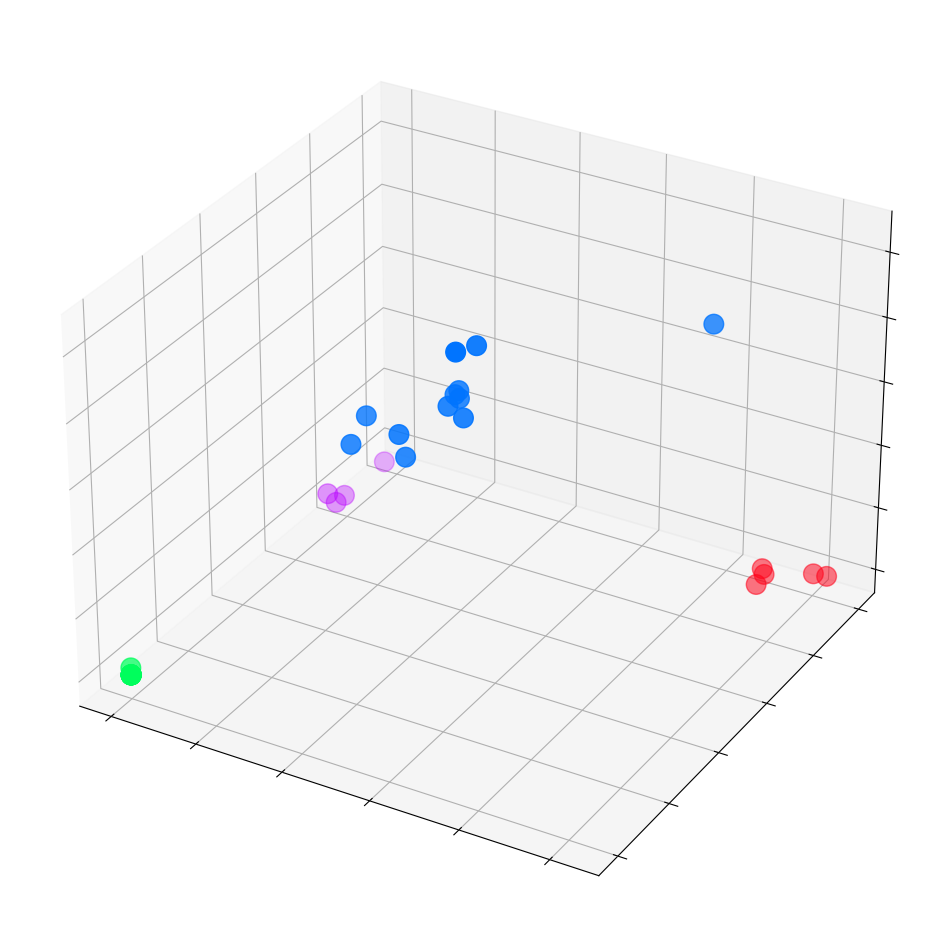

In [29]:
embed = h.detach().cpu().numpy()

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')
ax.patch.set_alpha(0)
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap='hsv',vmin=-2, vmax=3)
plt.show()

In [30]:
%%capture

def animate(i):
    embed = embeddings[i].detach().cpu().numpy()
    ax.clear()
    ax.scatter(embed[:, 0], embed[:, 1], embed[:, 2],
           s=200, c=data.y, cmap="hsv", vmin=-2, vmax=3)
    plt.title(f'Epoch {i} | Loss: {losses[i]:.2f} | Acc: {accuracies[i]*100:.2f}%',
              fontsize=18, pad=40)

fig = plt.figure(figsize=(12, 12))
plt.axis('off')
ax = fig.add_subplot(projection='3d')
plt.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)

anim = animation.FuncAnimation(fig, animate, \
              np.arange(0, 200, 10), interval=800, repeat=True)
html = HTML(anim.to_html5_video())

In [31]:
display(html)